### HANDS ON SESSION 3


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic
from scipy.stats import linregress
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
from datetime import datetime 
from pathlib import Path
import random
from matplotlib import colormaps
from astropy.table import Table
THISDIR=os.getcwd()

#### First point: the redshift distribution of the galaxies in the sample 

       z_best      
-------------------
0.22689999639987946
 0.8294199705123901
  1.164199948310852
 1.6591299772262573
 2.9928300380706787


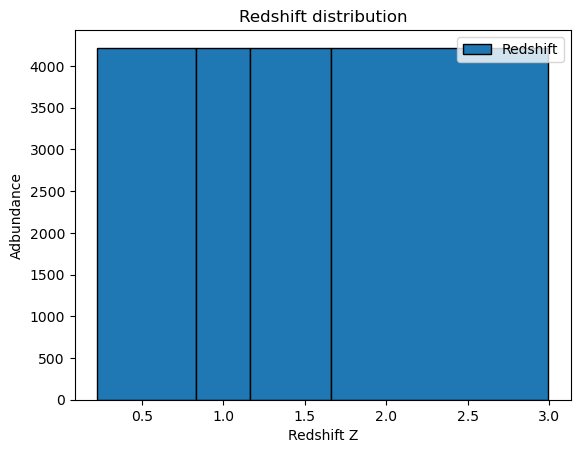

In [19]:
Table=Table.read(f"{THISDIR}\\3DHST_Allfields.fits")
plt.hist(Table['z_best'], bins=np.percentile(Table['z_best'], [0,25,50,75,100]), label='Redshift', edgecolor="black") 
plt.xlabel('Redshift Z')
plt.ylabel('Adbundance')
plt.title('Redshift distribution')
plt.legend()
plt.show
print(np.percentile(Table['z_best'], [0,25,50,75,100]))

#### Second point:  distribution of galaxies in the U −V vs V −J plane

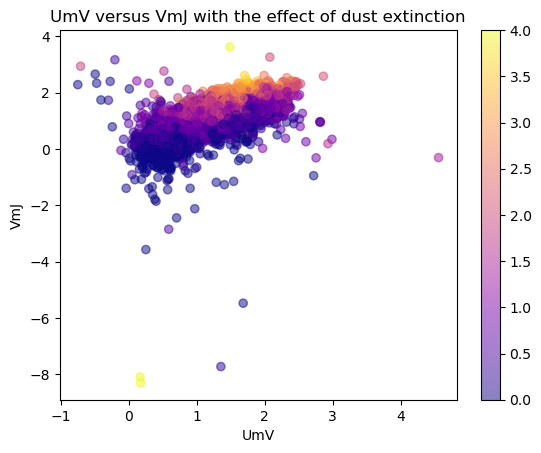

In [20]:
#dust extinction
plt.scatter(Table['UmV'], Table['VmJ'], alpha=0.5, c=Table['Av'], cmap='plasma')
plt.colorbar()
plt.xlabel('UmV')
plt.ylabel('VmJ')
plt.title('UmV versus VmJ with the effect of dust extinction')
plt.show()

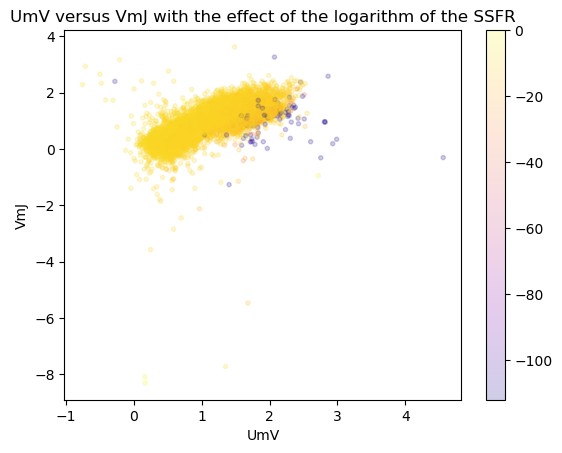

In [21]:
#Specific star formation rate 
SSFR=(Table['lsfr']-Table['lmass'])
plt.scatter(Table['UmV'], Table['VmJ'], alpha=0.2, c=SSFR, cmap='plasma', marker='.')
plt.colorbar()
plt.xlabel('UmV')
plt.ylabel('VmJ')
plt.title('UmV versus VmJ with the effect of the logarithm of the SSFR')
plt.show()

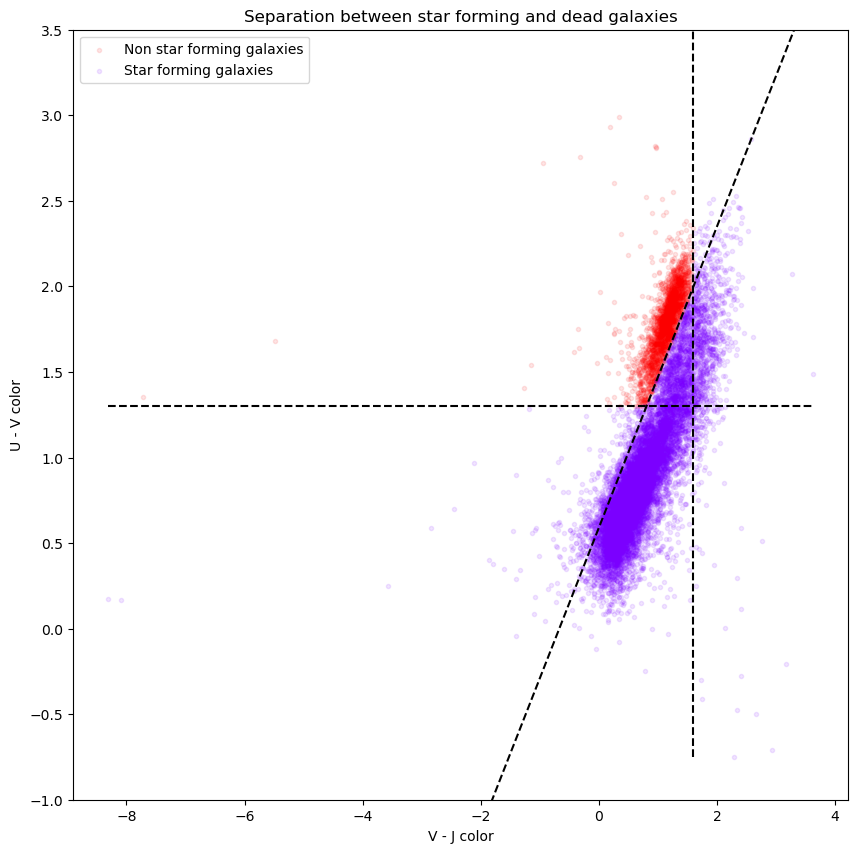

In [32]:
#definition of UVJ passive galaxies
passive=((Table['UmV']>(0.88*(Table['VmJ'])+0.59)) & (Table['UmV']>1.3) & (Table['VmJ']<1.6))
nonpassive = ~passive
Pass = Table[passive]
Nonpass = Table[nonpassive]
xfake=np.linspace(min(Nonpass['VmJ']), max(Nonpass['VmJ']), 5000)
yfake=0.88*xfake+0.59


plt.figure(figsize=(10, 10))
plt.scatter(Pass['VmJ'], Pass['UmV'], alpha=0.1, color="#FC0000", label='Non star forming galaxies', marker='.')
plt.scatter(Nonpass['VmJ'], Nonpass['UmV'], alpha=0.1, color="#7B00FFFF", label='Star forming galaxies', marker='.')
plt.legend()
plt.plot(xfake, yfake, color='black', linestyle='dashed')
plt.hlines(1.3, min(Nonpass['VmJ']), max(Nonpass['VmJ']), linestyle='dashed', color='#000000')
plt.vlines(1.6, min(Nonpass['UmV']), max(Pass['UmV']), linestyle='dashed', color='#000000')
plt.title('Separation between star forming and dead galaxies')
plt.ylim(-1, 3.5)
plt.xlabel('V - J color')
plt.ylabel('U - V color')
plt.show()

#### Third point: Plot the stellar mass vs SFR (or sSFR) relation in the different redshift bins

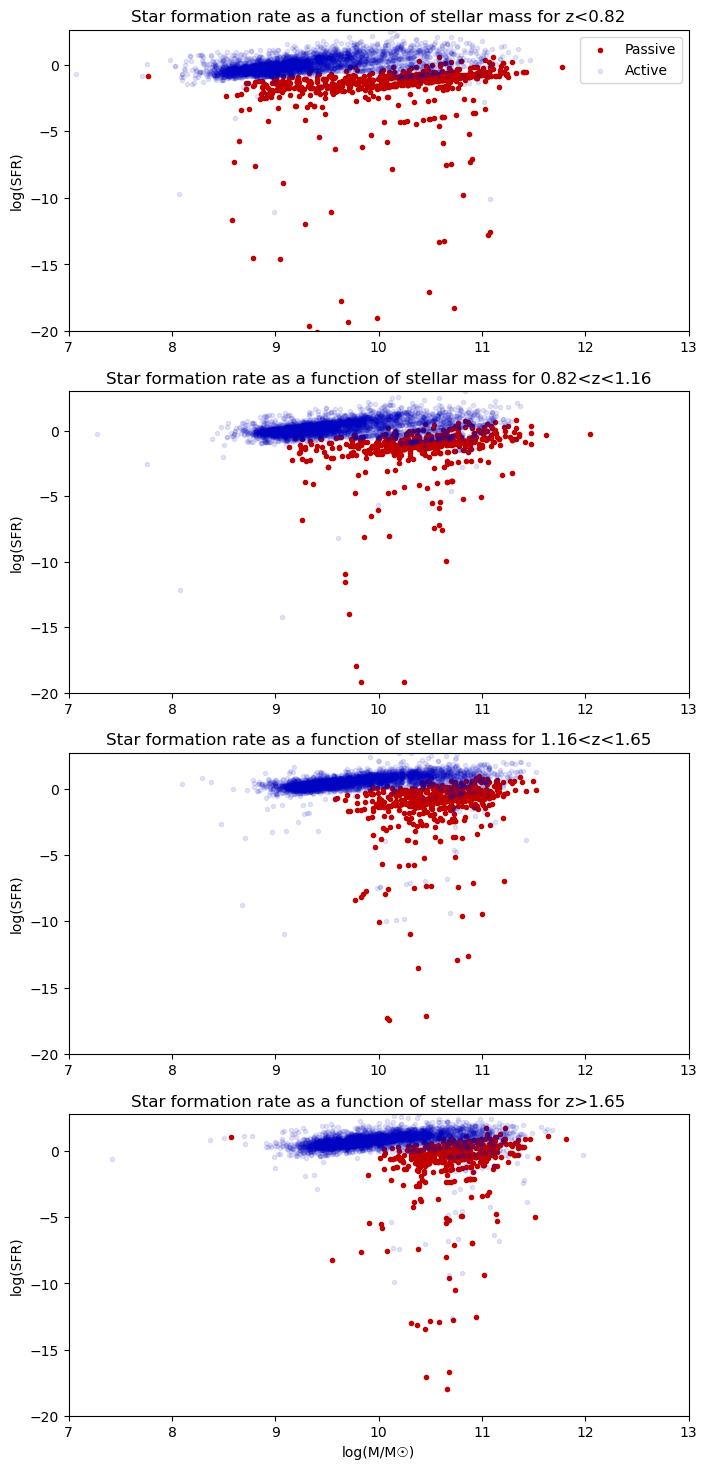

In [23]:
passive_z1 = ((Table['UmV']>(0.88*(Table['VmJ'])+0.59)) &
              (Table['UmV']>1.3) & (Table['VmJ']<1.6) &
              (Table['z_best']<0.82))
nonpassive_z1 = (~((Table['UmV']>(0.88*(Table['VmJ'])+0.59)) &
                   (Table['UmV']>1.3) & (Table['VmJ']<1.6)) &
                 (Table['z_best']<0.82))

passive_z2 = ((Table['UmV']>(0.88*(Table['VmJ'])+0.59)) &
              (Table['UmV']>1.3) & (Table['VmJ']<1.6) &
              (Table['z_best']<1.16) & (Table['z_best']>0.82))
nonpassive_z2 = (~((Table['UmV']>(0.88*(Table['VmJ'])+0.59)) &
                   (Table['UmV']>1.3) & (Table['VmJ']<1.6)) &
                 (Table['z_best']<1.16) & (Table['z_best']>0.82))

passive_z3 = ((Table['UmV']>(0.88*(Table['VmJ'])+0.59)) &
              (Table['UmV']>1.3) & (Table['VmJ']<1.6) &
              (Table['z_best']<1.65) & (Table['z_best']>1.16))
nonpassive_z3 = (~((Table['UmV']>(0.88*(Table['VmJ'])+0.59)) &
                   (Table['UmV']>1.3) & (Table['VmJ']<1.6)) &
                 (Table['z_best']<1.65) & (Table['z_best']>1.16))

passive_z4 = ((Table['UmV']>(0.88*(Table['VmJ'])+0.59)) &
              (Table['UmV']>1.3) & (Table['VmJ']<1.6) &
              (Table['z_best']>1.65))
nonpassive_z4 = (~((Table['UmV']>(0.88*(Table['VmJ'])+0.59)) &
                   (Table['UmV']>1.3) & (Table['VmJ']<1.6)) &
                 (Table['z_best']>1.65))    

Pass1 = Table[passive_z1]
Nonpass1 = Table[nonpassive_z1]
Pass2 = Table[passive_z2]
Nonpass2 = Table[nonpassive_z2]
Pass3 = Table[passive_z3]
Nonpass3 = Table[nonpassive_z3]
Pass4 = Table[passive_z4]
Nonpass4 = Table[nonpassive_z4]

fig, ax = plt.subplots(4, 1, figsize=(8,18))
ax[0].scatter(Pass1['lmass'], Pass1['lsfr'], color="#C10000", label='Passive', alpha=1, marker='.')
ax[0].scatter(Nonpass1['lmass'], Nonpass1['lsfr'], color="#0003C1", label='Active', alpha=0.1, marker='.')
ax[0].title.set_text('Star formation rate as a function of stellar mass for z<0.82')
ax[0].set_xlim(7,13)
ax[1].scatter(Pass2['lmass'], Pass2['lsfr'], color="#C10000", label='Passive', alpha=1, marker='.')
ax[1].scatter(Nonpass2['lmass'], Nonpass2['lsfr'], color="#0003C1", label='Active', alpha=0.1, marker='.')
ax[1].title.set_text('Star formation rate as a function of stellar mass for 0.82<z<1.16')
ax[1].set_xlim(7,13)
ax[2].scatter(Pass3['lmass'], Pass3['lsfr'], color="#C10000", label='Passive', alpha=1, marker='.')
ax[2].scatter(Nonpass3['lmass'], Nonpass3['lsfr'], color="#0003C1", label='Active', alpha=0.1, marker='.')
ax[2].title.set_text('Star formation rate as a function of stellar mass for 1.16<z<1.65')
ax[2].set_xlim(7,13)
ax[3].scatter(Pass4['lmass'], Pass4['lsfr'], color="#C10000", label='Passive', alpha=1, marker='.')
ax[3].scatter(Nonpass4['lmass'], Nonpass4['lsfr'], color="#0003C1", label='Active', alpha=0.1, marker='.')
ax[3].title.set_text('Star formation rate as a function of stellar mass for z>1.65')
ax[3].set_xlim(7,13)
ax[2].set_xlim(7,13)
ax[1].set_xlim(7,13)
ax[0].set_xlim(7,13)
ax[3].set_ylim(-20,max(Table['lsfr'][nonpassive_z4]))
ax[2].set_ylim(-20,max(Table['lsfr'][nonpassive_z3]))
ax[1].set_ylim(-20,max(Table['lsfr'][nonpassive_z2]))
ax[0].set_ylim(-20,max(Table['lsfr'][nonpassive_z1]))
ax[0].legend()
plt.xlabel('log(M/M☉)')
ax[0].set_ylabel('log(SFR)')
ax[1].set_ylabel('log(SFR)')
ax[2].set_ylabel('log(SFR)')
ax[3].set_ylabel('log(SFR)')
plt.show()


#### Third point part 2: fitting the main sequence

-9.713000106811528
-9.603999996185305
-9.36100006115775
-9.099499988555909


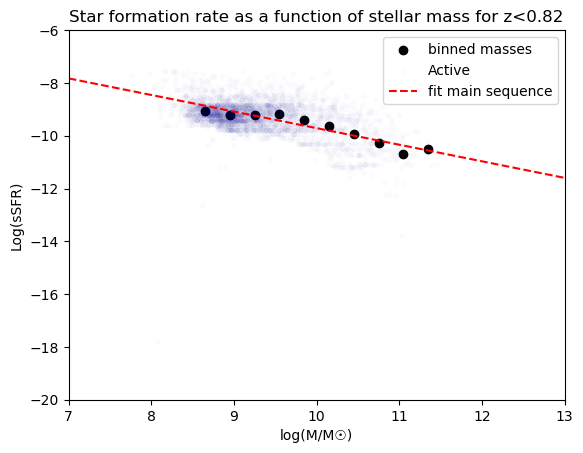

In [24]:
bin_means1, bin_edges1, binnumber1=binned_statistic(Nonpass1['lmass'], (Nonpass1['lsfr']-Nonpass1['lmass']), 'median', 10, (8.5,11.5))
bin_means2, bin_edges2, binnumber2=binned_statistic(Nonpass2['lmass'], (Nonpass2['lsfr']-Nonpass2['lmass']), 'median', 10, (8.5,11.5))
bin_means3, bin_edges3, binnumber3=binned_statistic(Nonpass3['lmass'], (Nonpass3['lsfr']-Nonpass3['lmass']), 'median', 10, (8.5,11.5))
bin_means4, bin_edges4, binnumber4=binned_statistic(Nonpass4['lmass'], (Nonpass4['lsfr']-Nonpass4['lmass']), 'median', 10, (8.5,11.5))
medianM1=[]
medianM2=[]
medianM3=[]
medianM4=[]
def linearfunc (x, m, q):
    return m*x+q

for i in range (len(bin_edges1)-1):
    medianM1.append((bin_edges1[i]+bin_edges1[i+1])/2)
for i in range (len(bin_edges2)-1):
    medianM2.append((bin_edges2[i]+bin_edges2[i+1])/2)
for i in range (len(bin_edges3)-1):
    medianM3.append((bin_edges3[i]+bin_edges3[i+1])/2)
for i in range (len(bin_edges4)-1):
    medianM4.append((bin_edges4[i]+bin_edges4[i+1])/2)

fakeM=np.linspace(7,13, 5000)

popt1, cov1 = curve_fit(linearfunc, medianM1, bin_means1)
print(10*popt1[0]+popt1[1])
popt2, cov2 = curve_fit(linearfunc, medianM2, bin_means2)
print(10*popt2[0]+popt2[1])
popt3, cov3 = curve_fit(linearfunc, medianM3, bin_means3)
print(10*popt3[0]+popt3[1])
popt4, cov4 = curve_fit(linearfunc, medianM4, bin_means4)
print(10*popt4[0]+popt4[1])

plt.scatter( medianM1, bin_means1, color='black', alpha=1, label='binned masses')
plt.scatter(Nonpass1['lmass'], (Nonpass1['lsfr']-Nonpass1['lmass']), color="#0003C1", label='Active', alpha=0.01, marker='.')
plt.plot(fakeM, fakeM*popt1[0]+popt1[1], label='fit main sequence', linestyle='dashed', color='red')
plt.title('Star formation rate as a function of stellar mass for z<0.82')
plt.ylim(-20,-6)
plt.xlim(7,13)
plt.xlabel('log(M/M☉)')
plt.ylabel('Log(sSFR)')
plt.legend()
plt.show()



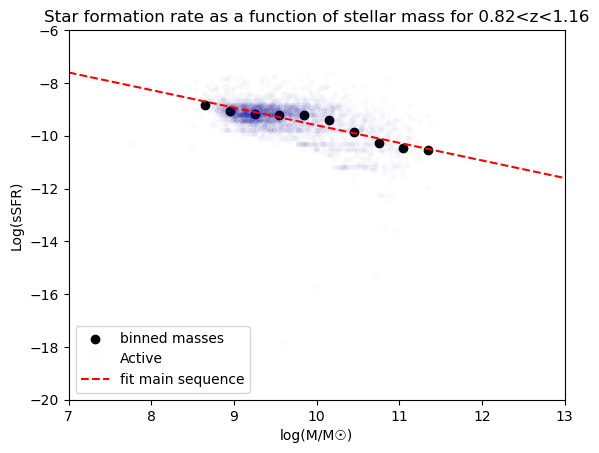

In [25]:
plt.scatter( medianM2, bin_means2, color='black', alpha=1, label='binned masses')
plt.scatter(Nonpass2['lmass'], (Nonpass2['lsfr']-Nonpass2['lmass']), color="#0003C1", label='Active', alpha=0.01, marker='.')
plt.plot(fakeM, fakeM*popt2[0]+popt2[1], label='fit main sequence', linestyle='dashed', color='red')
plt.title('Star formation rate as a function of stellar mass for 0.82<z<1.16')
plt.ylim(-20,-6)
plt.xlim(7,13)
plt.xlabel('log(M/M☉)')
plt.ylabel('Log(sSFR)')
plt.legend()
plt.show()

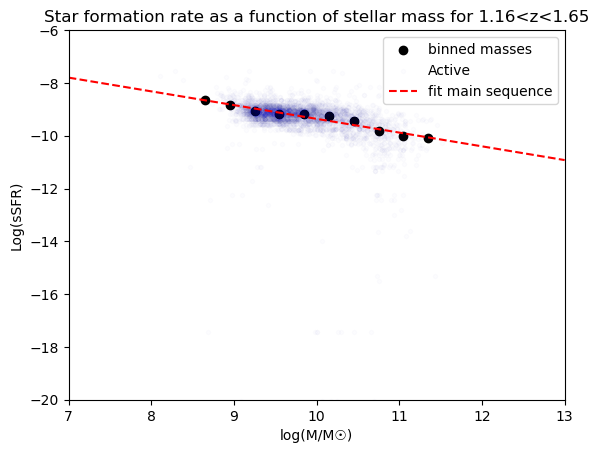

In [26]:
plt.scatter( medianM3, bin_means3, color='black', alpha=1, label='binned masses')
plt.scatter(Nonpass3['lmass'], (Nonpass3['lsfr']-Nonpass3['lmass']), color="#0003C1", label='Active', alpha=0.01, marker='.')
plt.plot(fakeM, fakeM*popt3[0]+popt3[1], label='fit main sequence', linestyle='dashed', color='red')
plt.title('Star formation rate as a function of stellar mass for 1.16<z<1.65')
plt.ylim(-20,-6)
plt.xlim(7,13)
plt.xlabel('log(M/M☉)')
plt.ylabel('Log(sSFR)')
plt.legend()
plt.show()

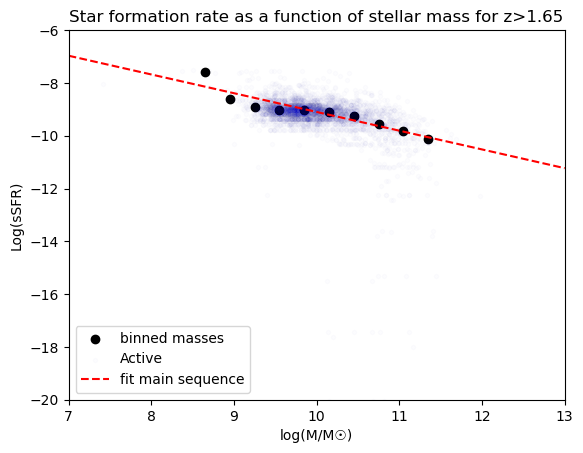

In [27]:
plt.scatter( medianM4, bin_means4, color='black', alpha=1, label='binned masses')
plt.scatter(Nonpass4['lmass'], (Nonpass4['lsfr']-Nonpass4['lmass']), color="#0003C1", label='Active', alpha=0.01, marker='.')
plt.plot(fakeM, fakeM*popt4[0]+popt4[1], label='fit main sequence', linestyle='dashed', color='red')
plt.title('Star formation rate as a function of stellar mass for z>1.65')
plt.ylim(-20,-6)
plt.xlim(7,13)
plt.xlabel('log(M/M☉)')
plt.ylabel('Log(sSFR)')
plt.legend()
plt.show()

### Point 4: fraction of passive over active 


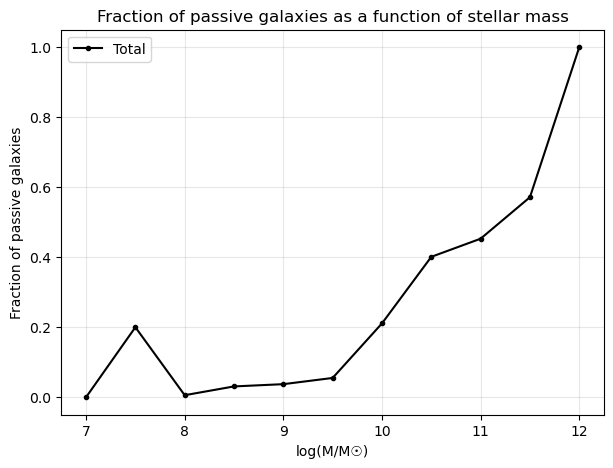

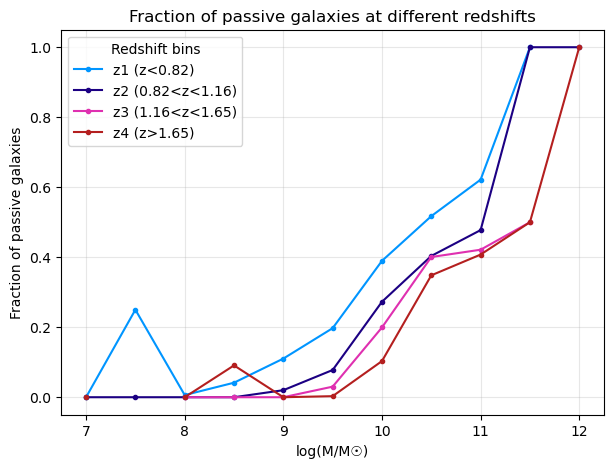

In [35]:
mass_bins = np.arange(7, 13, 0.5)
for i in range(5):
    m_pass = np.array(Pass['lmass'])
    m_nonpass = np.array(Nonpass['lmass'])

    #Counting galaxy number for every bin 
    N_pass, _, _ = binned_statistic(m_pass, np.ones_like(m_pass), statistic='sum', bins=mass_bins)
    N_nonpass, _, _ = binned_statistic(m_nonpass, np.ones_like(m_nonpass), statistic='sum', bins=mass_bins)
    den = N_pass + N_nonpass
    frazion = np.divide(
        N_pass,
        den,
        out=np.full_like(N_pass, np.nan, dtype=float),
        where=den != 0
    )

plt.figure(figsize=(7,5))
plt.plot(mass_bins[:-1], frazion, marker='.', label='Total', color='black')
plt.xlabel('log(M/M☉)')
plt.ylabel('Fraction of passive galaxies')
plt.title('Fraction of passive galaxies as a function of stellar mass')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

z_bins_data = {
    "z1 (z<0.82)": {"pass": Pass1, "nonpass": Nonpass1, "color": "#0095ff"},
    "z2 (0.82<z<1.16)": {"pass": Pass2, "nonpass": Nonpass2, "color": "#1C0083"},
    "z3 (1.16<z<1.65)": {"pass": Pass3, "nonpass": Nonpass3, "color": "#df30b0"},
    "z4 (z>1.65)": {"pass": Pass4, "nonpass": Nonpass4, "color": "#b41f1f"},
}


#rsults
fractions = {}

plt.figure(figsize=(7,5))

for zbin, data in z_bins_data.items():
    #Getting the masses
    m_pass = np.array(data["pass"]["lmass"])
    m_nonpass = np.array(data["nonpass"]["lmass"])
    

    #Counting galaxi number for every bin 
    N_pass, _, _ = binned_statistic(m_pass, np.ones_like(m_pass), statistic='sum', bins=mass_bins)
    N_nonpass, _, _ = binned_statistic(m_nonpass, np.ones_like(m_nonpass), statistic='sum', bins=mass_bins)

    den = N_pass + N_nonpass
    frac = np.divide(
        N_pass,
        den,
        out=np.full_like(N_pass, np.nan, dtype=float),
        where=den != 0
    )

    # Salva i risultati
    fractions[zbin] = {"mass_bins": mass_bins[:-1], "frac": frac}
    

    plt.plot(mass_bins[:-1], frac, marker='.', label=zbin,  color=data["color"])

plt.xlabel('log(M/M☉)')
plt.ylabel('Fraction of passive galaxies')
plt.legend(title='Redshift bins')
plt.title('Fraction of passive galaxies at different redshifts')
plt.grid(alpha=0.3)
plt.show()

#now the total plot with no redshift division




